In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn import datasets
from sklearn import svm  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC  
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [44]:
iris = datasets.load_iris()

# Part 1: Visualizing the Iris dataset


#### 1.1) Visualizing the relationship between Sepal and target classes.

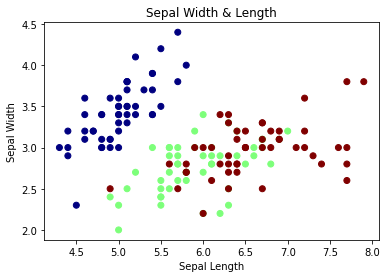

In [45]:
a = iris.data[:, :2]  
b = iris.target
plt.scatter(a[:, 0], a[:, 1], c=b, cmap=plt.cm.jet)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Width & Length')
plt.show()

#### 1.2) Visualizing the relationship between Petal and target classes.



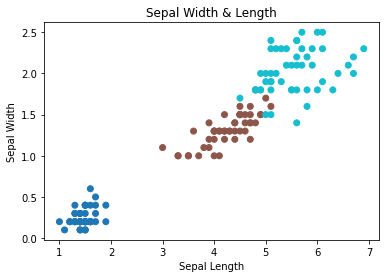

In [46]:
a = iris.data[:, 2:]  
b = iris.target
plt.scatter(a[:, 0], a[:, 1], c=b, cmap=plt.cm.tab10)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Width & Length')
plt.show()

#### 2.) For Iris Sepal features, modeling SVM classifier with kernels of linear, RBF, and polynomial with degree=3.

In [47]:
a = iris.data[:, :2]  
b = iris.target
C = 1.0 

x_train, x_test, y_train, y_test = train_test_split(a, b, random_state = 0, test_size = 0.30)
 
svc = svm.SVC(kernel='linear', C=C).fit(x_train, y_train)
lin_svc = svm.LinearSVC(C=C).fit(x_train, y_train)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(x_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(x_train, y_train)

c:\python38\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


#### 3.) Using scatter to visualize the above SVM classifiers with Iris Sepal features.

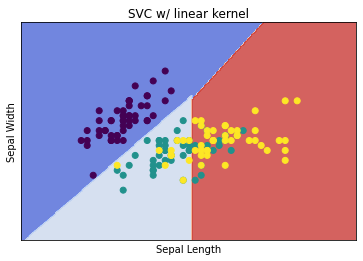

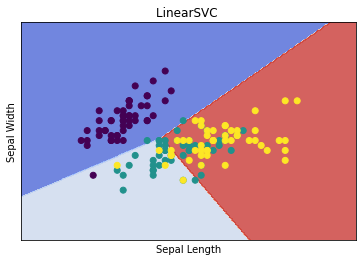

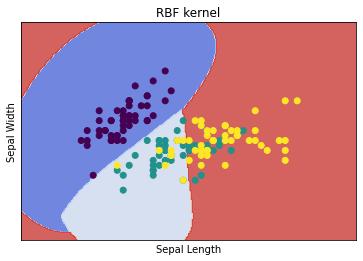

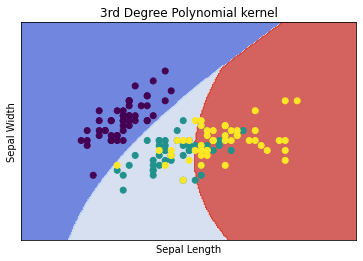

In [48]:
h = .02

x_min, x_max = a[:, 0].min() - 1, a[:, 0].max() + 1
y_min, y_max = a[:, 1].min() - 1, a[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

titles = ['SVC w/ linear kernel','LinearSVC ','RBF kernel','3rd Degree Polynomial kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(a[:, 0], a[:, 1], c=b, cmap=plt.cm.viridis)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
    plt.title(titles[i])
    plt.show()

#### 4.) Calculating the accuracy scores of predicting Iris Sepal features with above SVM classifiers.


In [49]:
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    y_pred = clf.predict(x_test)
    print("\n Accuracy Score Using ",str(clf),round(accuracy_score(y_test, y_pred)*100,2),"%")


 Accuracy Score Using  SVC(kernel='linear') 80.0 %

 Accuracy Score Using  LinearSVC() 68.89 %

 Accuracy Score Using  SVC(gamma=0.7) 77.78 %

 Accuracy Score Using  SVC(kernel='poly') 80.0 %


#### 5.) Parameter Tuning:
- Using grid search cross validation to tune an optimal “C” in the kernels of linear, RBF, and polynomial with an optimal degree.

In [50]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.001, 0.0001],'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['poly'], 'gamma': [0.001, 0.0001],'C': [1, 10, 100, 1000]}]
grid = GridSearchCV(SVC(),tuned_parameters,refit=True,verbose=2)
grid_mod = grid.fit(x_train,y_train)
grid_pred = grid_mod.predict(x_test)
print("\n Accuracy Score Using grid search CV", round(accuracy_score(y_test, grid_pred)*100,2),"%")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.00

#### 6.) Model Selection:
- Using 5-fold cross validation (CV) to tune the number of neighbors or KNN (import KNeighborsClassifier); and find the best accuracy.

In [51]:
# knn_mod = knn_cv.fit(x_train,y_train)
# knn_y_pred = knn_mod.predict(x_test)
# print("\n Accuracy Score Using Knn Algorithm with 5 Neighbors",round(accuracy_score(y_test, y_pred)*100,2),"%")

knn_cv = KNeighborsClassifier(n_neighbors=5)
knn_kf = KFold(n_splits=5)
fivefold_scores=[]

for train,test in knn_kf.split(a,b):
    fivefold_model = knn_cv.fit(a[train],b[train])
    score = fivefold_model.score(a[test],b[test])
    fivefold_scores.append(score)    

print(" The mean score for %d-fold cross validation is %.2f" % (knn_kf.get_n_splits(),np.mean(np.array(fivefold_scores))*100),"%")


 The mean score for 5-fold cross validation is 60.00 %


#### 7.) Visualizing and analyzing the above models to conclude the optimal one and explain the reason.


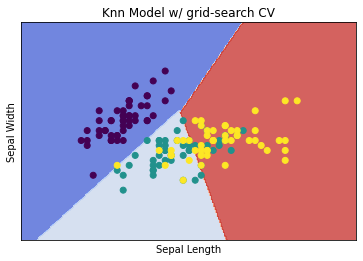

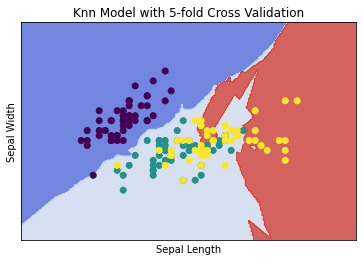

In [52]:
title =["Knn Model w/ grid-search CV","Knn Model with 5-fold Cross Validation"]
for i, clf in enumerate((grid_mod,fivefold_model)):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(a[:, 0], a[:, 1], c=b, cmap=plt.cm.viridis)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
    plt.title(title[i])
    plt.show()

- From the two different tuning techniques it is understood that accuracy of KNN model was better when tuned using grid serach CV method,  wheres the K-fold tuning method did not provide much accuracy. 

- In the classification chart depicted above, indicates the smooth classification metrics of grid search CV but K-Fold method seems to be distorted

- Accuracy score of grid search cv (80%) > K-Fold cross validation (60%), hence I prefer grid search cv tuning method for my K Nearest Neighbor Model

# Part 2: Analyzing Advertisement 



In [53]:
df = pd.read_csv('advertising.csv')


In [54]:
df.describe()
df.drop(['Unnamed: 0'],inplace=True,axis=1)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [55]:
# Preparing model
y = df['Sales']
X1 = df.iloc[:,:3]
x_train, x_test, y_train, y_test = train_test_split(X1, y, random_state = 0, test_size = 0.25)

In [56]:
# Fitting linear regression model with newspaper feature
lin_model1 = LinearRegression()
lin_model1.fit(x_train,y_train)
y_lin_pred1 = lin_model1.predict(x_test) 

### 2.1 Using 10-fold cross-validation with the features of media with  “Newspaper”:


In [57]:
kf = KFold(n_splits=10)
scores1=[]
for train,test in kf.split(X1,y):
    model = lin_model1.fit(X1.values[train],y.values[train])
    s1 = model.score(X1.values[test],y.values[test])
    print(s1)
    scores1.append(s1)
    
print("The mean score for %d-fold cross validation with newspaper is %.2f" % (kf.get_n_splits(),round(np.mean(np.array(scores1)),2)))

0.8730269590985928
0.8581613040148899
0.9296872316691296
0.8901327151837942
0.9314649771656575
0.9313873454259836
0.7597900975397521
0.912170969514483
0.8389175289923594
0.9288231093749741
The mean score for 10-fold cross validation with newspaper is 0.89


### 2.1 Using 10-fold cross-validation with the features of media without “Newspaper”:


In [58]:
X2 = df.iloc[:,:2]
lin_kf2 = KFold(n_splits=10)
scores2=[]
for train,test in lin_kf2.split(X2,y):
    model = lin_model1.fit(X2.values[train],y.values[train])
    s2 = model.score(X2.values[test],y.values[test])
    print(s2)
    scores2.append(s2)
    
print("The mean score for %d-fold cross validation without newspaper is %.2f" % (lin_kf2.get_n_splits(),np.mean(np.array(scores2))))

0.8793656056731977
0.8586049554111229
0.9296057440828019
0.8904010465560822
0.9330255392755856
0.9312974310975424
0.7648677159773611
0.913732546612499
0.8392551853140554
0.9295147468098792
The mean score for 10-fold cross validation without newspaper is 0.89


### 2.2 Calculating the average MSE score with and without “Newspaper”:


In [59]:
mse1 = mean_squared_error(y_test,y_lin_pred1)
print("Mean Square Error for model with Newpaper Feature",round(mse1,2))

Mean Square Error for model with Newpaper Feature 4.01


In [60]:
y3 = df['Sales']
X3 = df.iloc[:,:2]
x_train2, x_test2, y_train2, y_test2 = train_test_split(X3, y3, random_state = 0, test_size = 0.25)

In [61]:
lin_model2 = LinearRegression()
lin_model2.fit(x_train2,y_train2)
y_lin_pred2 = lin_model1.predict(x_test2) 

In [62]:
mse2 = mean_squared_error(y_test,y_lin_pred2)
print("Mean Square Error for model without Newpaper Feature",round(mse2,2))

Mean Square Error for model without Newpaper Feature 3.64


### 2.3 Analyzing the MSE scores from the two models and explaining:

- Analyzing both the models with & without newspaper feature we come to a conclusion that mean_square_error for both the models are quite similar 
- But the model without newspaper feature produces lesser mean square error of (3.6) when compared to the later (4.010) 
- Lesser the mean square error greater the accuracy 
- Hence, I prefer the model without newspaper feature

# Part 3: Classifying Digits 


In [63]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
digits = load_digits()


#### 1.) Visualize the first one hundred of these digits.


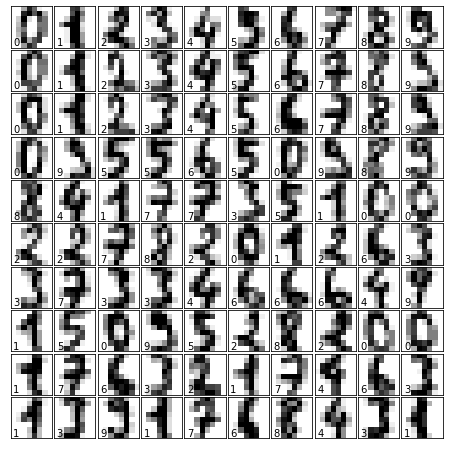

In [64]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

#### 2.) Use PCA and Isomap for dimensionality reduction to plot in two dimensions.

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import datasets

from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import  recall_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score 
from sklearn.naive_bayes import GaussianNB


In [66]:
# Load Digits dataset
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Parameters
dim = len(X[0])
n_classes = len(np.unique(y))
n_neighbors = 3
random_state = 0

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=random_state)


In [67]:
pca = make_pipeline(StandardScaler(),PCA(n_components=2,random_state=random_state))

In [68]:
isomap = make_pipeline(StandardScaler(),Isomap(n_components=2,n_jobs = 4,n_neighbors = 5))

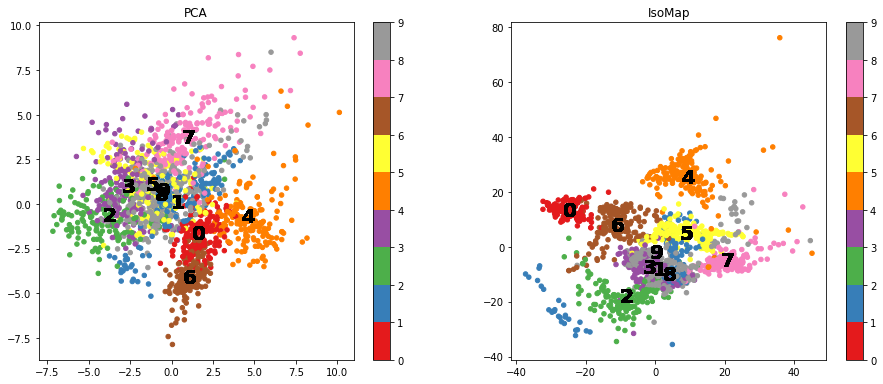

In [69]:
dim_red_methods = {'PCA': pca, 'IsoMap': isomap}
plt.figure(figsize=(24, 36))

for j,(name, model) in enumerate(dim_red_methods.items()):
    plt.subplot(5, 3, j + 1, aspect='auto')

    model.fit(X_train, y_train)
    X_embedded = model.transform(X)
    df = pd.DataFrame(np.concatenate((X_embedded, np.reshape(y, (-1, 1))), axis=1))

    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=20, cmap='Set1')
    plt.title(name)
    plt.colorbar()
    
    # Label the data distributions
    for i, number in enumerate(y_test):
        plt.annotate(number,df.loc[df[2]==number,[0,1]].mean(),horizontalalignment='center',
                     verticalalignment='center',
                     weight='bold',
                     size='20')
    
plt.show()

#### 3.) Analyze the visualization to find the digits that are roughly prone to be mislabeled.


- Analyzing visualization it appears like digits 5,8,9 will be having a greater collision, therefore these digits might be prone to mislabeling
- While observing isomap it could be observed that digits 1,3 have high degree of overlapping effect, hence they might be prone to mislabeling

#### 4.) Use Naïve Bayes classifier to classify the digits and print out the classification report for this classifier.


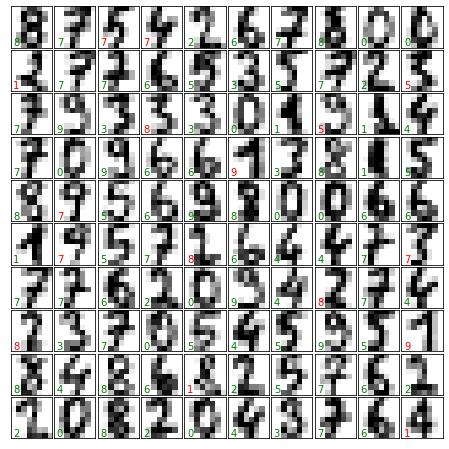

In [70]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

clf = GaussianNB()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
expected = y_test

fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

In [71]:
print("Naive Bayes (Gaussian) - Classification Report")
print(classification_report(expected, predicted))

Naive Bayes (Gaussian) - Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       0.65      0.71      0.68        34
           2       0.96      0.61      0.74        38
           3       0.93      0.78      0.85        50
           4       0.97      0.87      0.92        45
           5       0.88      0.88      0.88        52
           6       0.98      0.95      0.97        44
           7       0.81      1.00      0.89        59
           8       0.57      0.80      0.67        44
           9       0.80      0.67      0.73        36

    accuracy                           0.84       450
   macro avg       0.86      0.83      0.83       450
weighted avg       0.86      0.84      0.84       450



#### 5.) Use Random Forest classifier to classify the digits and print out the classification report for this classifier.


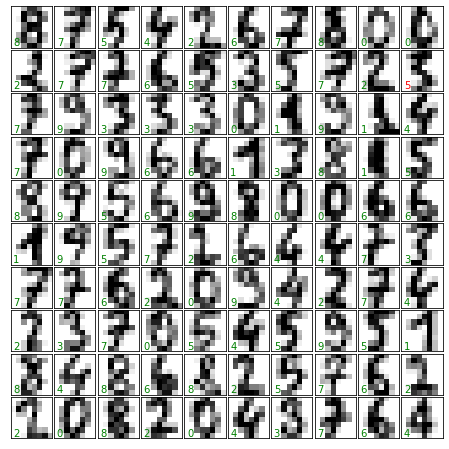

In [72]:
rclf = RandomForestClassifier(max_features='sqrt',n_jobs=-1,random_state=1)
rclf.fit(X_train, y_train)
pred = rclf.predict(X_test)
act = y_test 

fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')

    # label the image with the target value
    if pred[i] == act[i]:
        ax.text(0, 7, str(pred[i]), color='green')
    else:
        ax.text(0, 7, str(pred[i]), color='red')

In [73]:
print("Random Forest Classification Report")
print(classification_report(act, pred))

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        48
           1       0.97      0.97      0.97        34
           2       0.95      1.00      0.97        38
           3       1.00      0.98      0.99        50
           4       0.98      0.98      0.98        45
           5       0.94      0.98      0.96        52
           6       1.00      0.93      0.96        44
           7       0.98      1.00      0.99        59
           8       0.98      0.93      0.95        44
           9       0.97      1.00      0.99        36

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



#### 6.) In addition to the default number of estimators, try to find the best number of estimators (i.e. tune the parameter) to get the best Random Forest classifier.


In [74]:
test_results = {}

for estimator in range(2,500,2):
    rclf = RandomForestClassifier(n_estimators=estimator,n_jobs=-1,random_state=1)
    rclf.fit(X_train, y_train)
    y_pred = rclf.predict(X_test)
    score = accuracy_score(y_test, y_pred)*100
    test_results[estimator] = score

max_value = max(test_results.values())  
max_keys = [k for k, v in test_results.items() if v == max_value] 

print("Other Best Possible n_estimators ", max_keys)
print("And they have an accuracy of",max_value)

Other Best Possible n_estimators  [142, 144, 150, 152, 154, 156, 164, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186]
And they have an accuracy of 98.22222222222223


#### 7.) Confusion Matrix - Naive Bayes

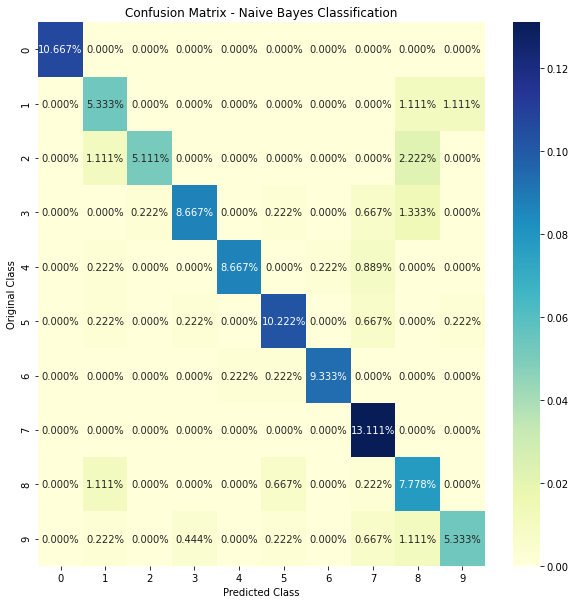

In [75]:
labels = [0,1]
nb_cf_matrix = confusion_matrix(expected, predicted)
fig, ax = plt.subplots(figsize=(10,10))  

sns.heatmap(nb_cf_matrix/np.sum(nb_cf_matrix), annot=True, fmt='.3%', cmap='YlGnBu', ax= ax)
plt.title('Confusion Matrix - Naive Bayes Classification')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()


#### 7.) Confusion Matrix - Random Forest

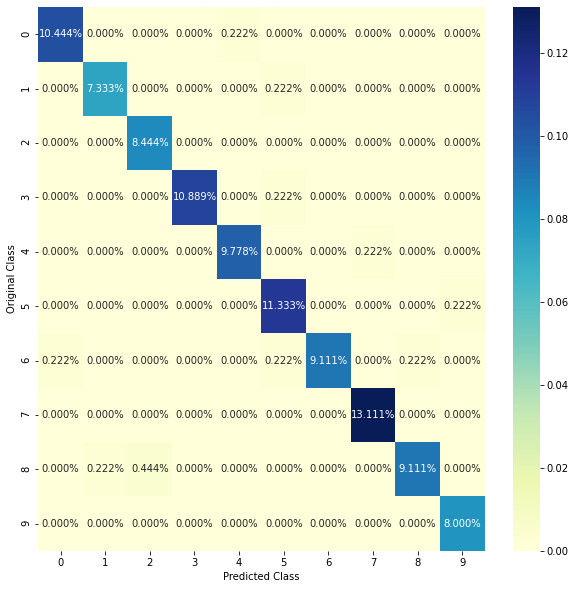

In [76]:
rf_cf_matrix = confusion_matrix(act, pred)
fig, ax = plt.subplots(figsize=(10,10))  

sns.heatmap(rf_cf_matrix/np.sum(nb_cf_matrix), annot=True, fmt='.3%', cmap='YlGnBu',ax= ax)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()